In [1]:
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
from sklearn import metrics


from scipy import linalg as scipy_linalg
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

import itertools


In [2]:
prosody_data = pd.read_csv('Prosodic_Features_MRH.csv',sep=",")
#prosody_data = pd.read_csv('prosodic_features_M2.csv',sep=",")

#expr = pd.read_csv(expr_file, sep="\t")
y = prosody_data['Hired3C'].values
#36
#X =prosody_data[['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgVal2', 'avgVal3', 'avgBand1', 'avgBand2', 'avgBand3', 'fmean1', 'fmean2', 'fmean3', 'f2meanf1', 'f3meanf1', 'f1STD', 'f2STD']]
#49X =prosody_data[['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgVal2', 'avgVal3', 'avgBand1', 'avgBand2', 'avgBand3', 'fmean1', 'fmean2', 'fmean3', 'f2meanf1', 'f3meanf1', 'f1STD', 'f2STD', 'f3STD', 'f2STDf1', 'f2STDf2', 'jitter', 'shimmer', 'jitterRap', 'meanPeriod', 'percentUnvoiced', 'numVoiceBreaks', 'PercentBreaks', 'speakRate', 'numPause', 'maxDurPause']]
#25X = prosody_data[['pitch_quant', 'meanPeriod', 'mean_pitch', 'fmean3', 'f3STD', 'f2STD', 'pitch_sd', 'shimmer', 'avgBand2', 'intensityMean', 'jitter', 'intensitySD', 'intensityQuant', 'jitterRap', 'f1STD', 'avgVal2', 'fmean2', 'PercentBreaks', 'AvgTotFall:3', 'f2STDf1', 'pitch_abs', 'f2STDf2', 'avgBand1', 'percentUnvoiced', 'AvgTotRis:3']]
#For MRH X = prosody_data.iloc[:, 6:].values
#For M2
X = prosody_data.iloc[:, 6:].values

X = StandardScaler().fit_transform(X)
#X = MinMaxScaler().fit_transform(X)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(X)
X_pca = pca.transform(X)
principalDf = pd.DataFrame(data = X_pca , columns = ['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10','PC11', 'PC12','PC13', 'PC14','PC15', 'PC16','PC17', 'PC18','PC19', 'PC20'])
principalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-4.168954,-0.014177,-2.475345,-0.810887,0.158383,-1.744078,-0.390702,0.265557,0.664753,1.053830,0.852550,-1.198339,0.200070,-0.733534,-1.235035,0.103792,1.158089,-0.448274,-0.798349,-0.337163
1,-4.464238,-1.009904,-3.092034,-1.055293,0.230520,-2.541514,-0.267613,0.678306,0.507352,1.239574,0.995480,-1.702563,0.455357,-0.275839,0.053702,0.166701,1.432173,-0.265949,-0.719729,-0.078568
2,-3.358534,0.101685,-2.585497,0.410778,1.336423,-2.501500,-0.698387,-0.107751,0.624623,1.094847,0.804501,-1.841722,0.020705,0.410376,0.199698,-0.220400,1.292651,-0.222985,-0.221539,0.060497
3,0.865701,-2.990583,-3.409886,3.427491,1.778394,-1.202344,0.742876,-1.396202,1.127661,-2.928789,-0.275881,-2.670816,-0.624271,-0.108673,0.953197,1.146561,1.633836,-0.566139,0.949633,0.609928
4,1.506023,-3.118672,-3.273643,1.326754,1.733809,-1.359053,1.285821,-1.184058,0.794970,-2.643697,0.574300,-1.356923,-0.637011,-0.660165,1.174451,1.339933,1.470939,-0.388300,1.199008,-0.148684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,-1.722865,0.621413,-2.511901,3.169306,-2.441883,-1.714762,-0.227481,0.926876,-1.283814,0.087162,0.307394,0.515535,1.552993,0.432336,-0.029463,-0.957235,0.665836,-0.728974,0.637202,-0.351263
676,-2.157176,0.879941,-2.401855,1.721035,-2.208042,-2.682219,-0.636729,1.491810,-1.361853,0.804770,0.408118,0.674544,2.267873,0.250259,0.651264,-1.064525,0.207522,-0.407454,-0.112806,-0.123722
677,-2.407032,2.363606,-1.592129,4.621724,-3.687422,0.870559,1.078026,-1.171054,-1.566512,-2.676464,0.168665,0.383444,1.421378,1.610897,0.787189,-0.769472,0.922129,-0.664309,0.114883,-0.676059
678,-0.943823,3.709886,-0.265405,3.604097,-0.754180,-2.480952,-0.034924,1.060394,-0.914385,0.231079,0.813387,0.337748,1.709105,0.381001,0.315750,-0.862295,0.346174,-0.474846,-0.509820,-0.356890


In [4]:
finalDf = pd.concat([principalDf, prosody_data[['Hired3C']]], axis = 1)
finalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,Hired3C
0,-4.168954,-0.014177,-2.475345,-0.810887,0.158383,-1.744078,-0.390702,0.265557,0.664753,1.053830,...,-1.198339,0.200070,-0.733534,-1.235035,0.103792,1.158089,-0.448274,-0.798349,-0.337163,1
1,-4.464238,-1.009904,-3.092034,-1.055293,0.230520,-2.541514,-0.267613,0.678306,0.507352,1.239574,...,-1.702563,0.455357,-0.275839,0.053702,0.166701,1.432173,-0.265949,-0.719729,-0.078568,1
2,-3.358534,0.101685,-2.585497,0.410778,1.336423,-2.501500,-0.698387,-0.107751,0.624623,1.094847,...,-1.841722,0.020705,0.410376,0.199698,-0.220400,1.292651,-0.222985,-0.221539,0.060497,1
3,0.865701,-2.990583,-3.409886,3.427491,1.778394,-1.202344,0.742876,-1.396202,1.127661,-2.928789,...,-2.670816,-0.624271,-0.108673,0.953197,1.146561,1.633836,-0.566139,0.949633,0.609928,1
4,1.506023,-3.118672,-3.273643,1.326754,1.733809,-1.359053,1.285821,-1.184058,0.794970,-2.643697,...,-1.356923,-0.637011,-0.660165,1.174451,1.339933,1.470939,-0.388300,1.199008,-0.148684,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,-1.722865,0.621413,-2.511901,3.169306,-2.441883,-1.714762,-0.227481,0.926876,-1.283814,0.087162,...,0.515535,1.552993,0.432336,-0.029463,-0.957235,0.665836,-0.728974,0.637202,-0.351263,0
676,-2.157176,0.879941,-2.401855,1.721035,-2.208042,-2.682219,-0.636729,1.491810,-1.361853,0.804770,...,0.674544,2.267873,0.250259,0.651264,-1.064525,0.207522,-0.407454,-0.112806,-0.123722,0
677,-2.407032,2.363606,-1.592129,4.621724,-3.687422,0.870559,1.078026,-1.171054,-1.566512,-2.676464,...,0.383444,1.421378,1.610897,0.787189,-0.769472,0.922129,-0.664309,0.114883,-0.676059,0
678,-0.943823,3.709886,-0.265405,3.604097,-0.754180,-2.480952,-0.034924,1.060394,-0.914385,0.231079,...,0.337748,1.709105,0.381001,0.315750,-0.862295,0.346174,-0.474846,-0.509820,-0.356890,0


In [5]:
def CreateModel( X_train, X_test, y_train, y_test):
    y_21_test = []
    for i in y_test:
        if(i == 2):
            y_21_test.append(2)
        else:
            y_21_test.append(1)

    y_21_train = []
    for i in y_train:
        if(i == 2):
            y_21_train.append(2)
        else:
            y_21_train.append(1)

    X = X_train
    y = y_21_train
    clf = SVC(probability=True)
    clf.fit(X, y)
    clf.score(X, y)
    #AdaBoostClassifier(n_estimators=100, random_state=0)
    y_21_predict=clf.predict(X_test)
    target_names = ['class 2', 'class 1']      
    print(classification_report(y_21_test,y_21_predict,target_names=target_names, zero_division=0))

    X_10_train = X_train.loc[y_train!= 2]
    #X_10_train =X_train[:,26] != 2
    X_10_test = X_test.loc[y_test!= 2]
    #X_10_test = X_test[:,26] != 2
    #select from y_train where y value is not 2
    y_10_train= []
    for i in y_train:
        if(i != 2):
            y_10_train.append(i)

    #select from y_test where y value is not 2
    y_10_test = []
    for i in y_test:
        if(i != 2):
            y_10_test.append(i)

    X = X_10_train
    y = y_10_train
    clf =  SVC(probability=True)
    clf.fit(X, y)
    clf.score(X, y)
    y_10_predict = clf.predict(X_10_test)
    target_names = ['class 1', 'class 0']      
    print(classification_report(y_10_test,y_10_predict ,target_names=target_names, zero_division=0))

    y1=list(y_test)
    y2=list(y_21_predict)
    y3=list(y_10_predict)
    combined_Predictions = []
    k=0
    for (i,j) in zip(y1,y2):
        if(i!=2):
            combined_Predictions.append(y3[k])
            k=k+1
        else:
            combined_Predictions.append(j)
    target_names = ['class 0', 'class 1', 'class 2']
    print(classification_report(y_test,combined_Predictions ,target_names=target_names, zero_division=0))
    acc = accuracy_score(y_test, combined_Predictions, normalize=True)


    plt.figure(figsize = (10,6))
    sns.heatmap(confusion_matrix(y_test, combined_Predictions), annot = True,fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
   # metrics.plot_roc_curve(clf, X_test, y_test) 
    
    acc = accuracy_score(y_test, combined_Predictions, normalize=True)
    f1 =  f1_score(y_test, combined_Predictions, average='weighted')
    precision = precision_score(y_test, combined_Predictions,average='micro')
  
   
    return acc,f1,precision

    return acc 


              precision    recall  f1-score   support

     class 2       0.98      0.98      0.98        46
     class 1       0.95      0.95      0.95        22

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0.97      0.97      0.97        68

              precision    recall  f1-score   support

     class 1       0.96      1.00      0.98        23
     class 0       1.00      0.96      0.98        23

    accuracy                           0.98        46
   macro avg       0.98      0.98      0.98        46
weighted avg       0.98      0.98      0.98        46

              precision    recall  f1-score   support

     class 0       0.96      1.00      0.98        23
     class 1       0.96      0.96      0.96        23
     class 2       1.00      0.95      0.98        22

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0

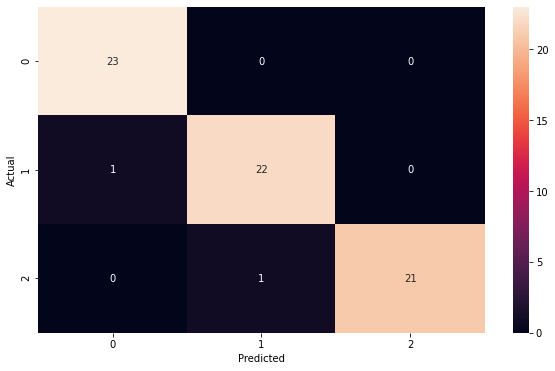

              precision    recall  f1-score   support

     class 2       1.00      1.00      1.00        46
     class 1       1.00      1.00      1.00        22

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        23
     class 0       1.00      1.00      1.00        23

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        23
     class 1       1.00      1.00      1.00        23
     class 2       1.00      1.00      1.00        22

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1

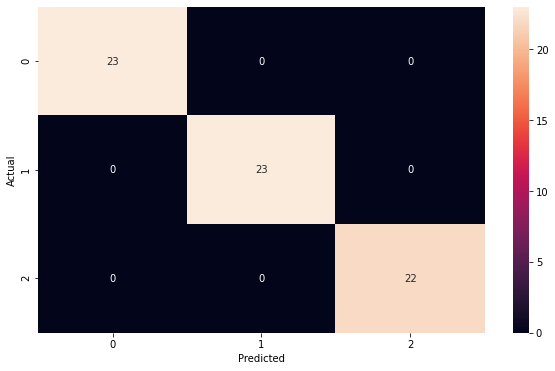

              precision    recall  f1-score   support

     class 2       0.98      0.96      0.97        46
     class 1       0.91      0.95      0.93        22

    accuracy                           0.96        68
   macro avg       0.95      0.96      0.95        68
weighted avg       0.96      0.96      0.96        68

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        23
     class 0       1.00      1.00      1.00        23

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        23
     class 1       0.96      1.00      0.98        23
     class 2       1.00      0.95      0.98        22

    accuracy                           0.99        68
   macro avg       0.99      0.98      0.99        68
weighted avg       0

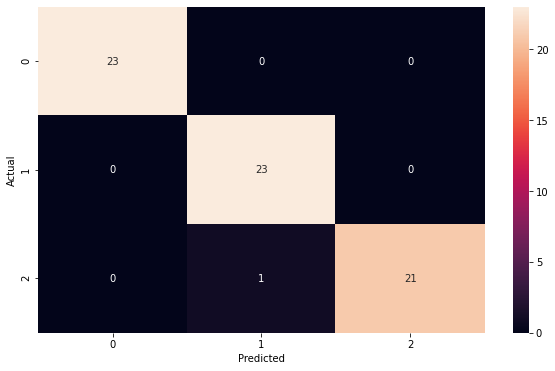

              precision    recall  f1-score   support

     class 2       1.00      1.00      1.00        46
     class 1       1.00      1.00      1.00        22

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        23
     class 0       1.00      1.00      1.00        23

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        23
     class 1       1.00      1.00      1.00        23
     class 2       1.00      1.00      1.00        22

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1

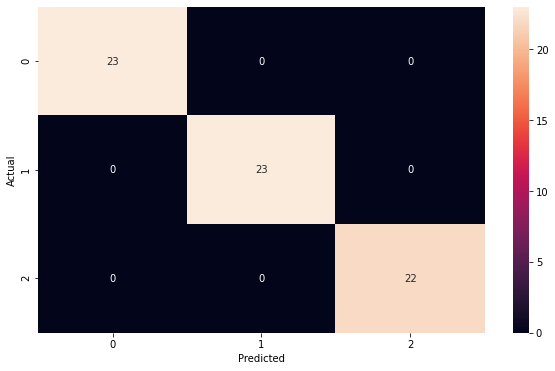

              precision    recall  f1-score   support

     class 2       0.88      1.00      0.94        46
     class 1       1.00      0.73      0.84        22

    accuracy                           0.91        68
   macro avg       0.94      0.86      0.89        68
weighted avg       0.92      0.91      0.91        68

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        23
     class 0       1.00      1.00      1.00        23

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        23
     class 1       0.79      1.00      0.88        23
     class 2       1.00      0.73      0.84        22

    accuracy                           0.91        68
   macro avg       0.93      0.91      0.91        68
weighted avg       0

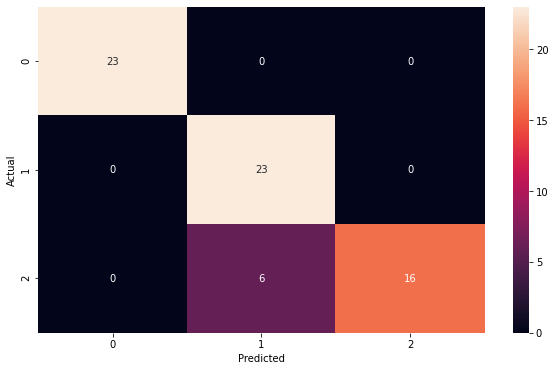

              precision    recall  f1-score   support

     class 2       1.00      1.00      1.00        45
     class 1       1.00      1.00      1.00        23

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        23
     class 0       1.00      1.00      1.00        22

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        23
     class 1       1.00      1.00      1.00        22
     class 2       1.00      1.00      1.00        23

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1

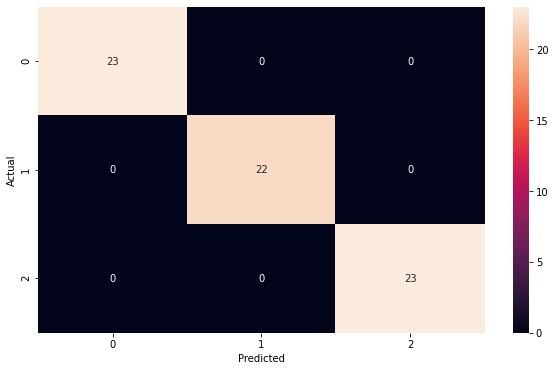

              precision    recall  f1-score   support

     class 2       0.96      0.96      0.96        45
     class 1       0.91      0.91      0.91        23

    accuracy                           0.94        68
   macro avg       0.93      0.93      0.93        68
weighted avg       0.94      0.94      0.94        68

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        23
     class 0       1.00      1.00      1.00        22

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        23
     class 1       0.92      1.00      0.96        22
     class 2       1.00      0.91      0.95        23

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0

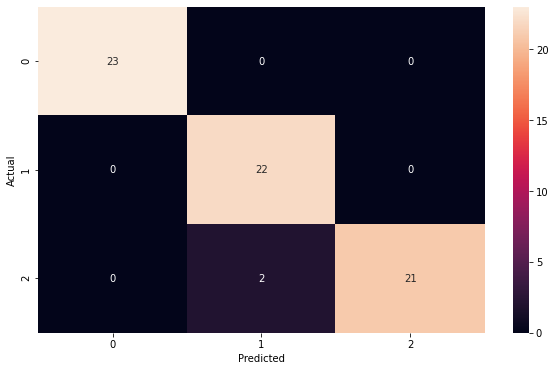

              precision    recall  f1-score   support

     class 2       1.00      0.98      0.99        45
     class 1       0.96      1.00      0.98        23

    accuracy                           0.99        68
   macro avg       0.98      0.99      0.98        68
weighted avg       0.99      0.99      0.99        68

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        23
     class 0       1.00      1.00      1.00        22

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        23
     class 1       1.00      1.00      1.00        22
     class 2       1.00      1.00      1.00        23

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1

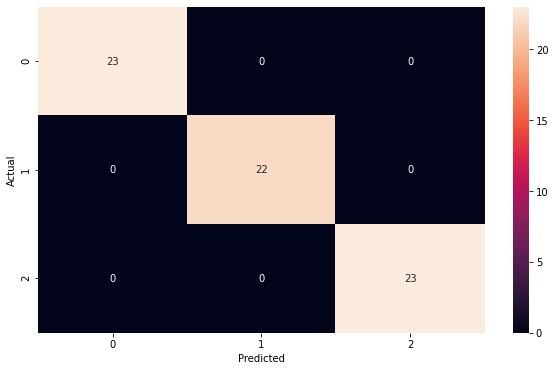

              precision    recall  f1-score   support

     class 2       0.98      0.98      0.98        45
     class 1       0.96      0.96      0.96        23

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0.97      0.97      0.97        68

              precision    recall  f1-score   support

     class 1       0.96      1.00      0.98        23
     class 0       1.00      0.95      0.98        22

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

              precision    recall  f1-score   support

     class 0       0.96      1.00      0.98        23
     class 1       0.95      0.95      0.95        22
     class 2       1.00      0.96      0.98        23

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0

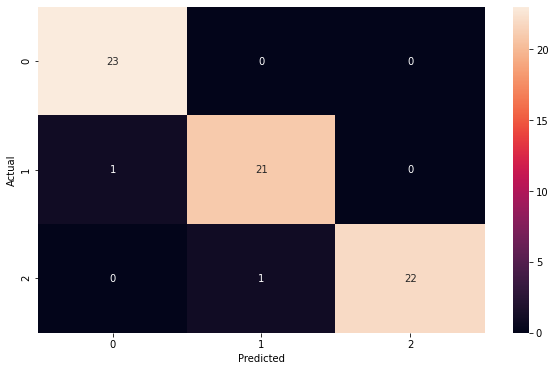

              precision    recall  f1-score   support

     class 2       0.98      1.00      0.99        45
     class 1       1.00      0.96      0.98        23

    accuracy                           0.99        68
   macro avg       0.99      0.98      0.98        68
weighted avg       0.99      0.99      0.99        68

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        23
     class 0       1.00      1.00      1.00        22

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        23
     class 1       0.96      1.00      0.98        22
     class 2       1.00      0.96      0.98        23

    accuracy                           0.99        68
   macro avg       0.99      0.99      0.99        68
weighted avg       0

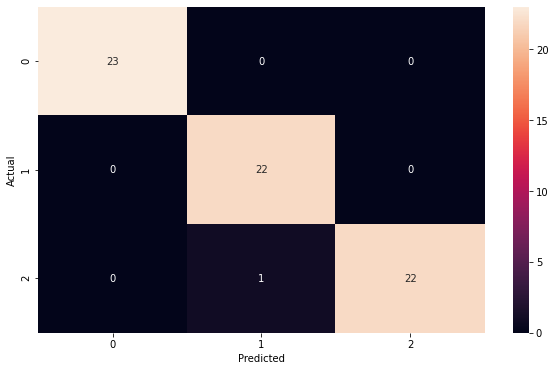

[97.05882352941177, 100.0, 98.52941176470588, 100.0, 91.17647058823529, 100.0, 97.05882352941177, 100.0, 97.05882352941177, 98.52941176470588]
CV Accuracy Score: 97.94% (+/- 2.56%)
CV  F1 Score: 97.92% (+/- 2.61%)
CV  Precision Score: 97.94% (+/- 2.56%)


In [6]:
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=12)
cv_acc_scores =[]
cv_f1_scores =[]
cv_precision_scores =[]

X= finalDf[['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10','PC11', 'PC12','PC13', 'PC14','PC15', 'PC16','PC17', 'PC18','PC19', 'PC20']]
y=finalDf['Hired3C']
for train_index, test_index in skf.split(X, y):


    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    acc,f1,precision = CreateModel( X_train, X_test, y_train, y_test)
    
    
    cv_acc_scores.append(acc*100)
    cv_f1_scores.append(f1*100)
    cv_precision_scores.append(precision*100)
   
print(cv_acc_scores ) 
print("CV Accuracy Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_acc_scores), np.std(cv_acc_scores)))
print("CV  F1 Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_f1_scores), np.std(cv_f1_scores)))
print("CV  Precision Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_precision_scores), np.std(cv_precision_scores)))


In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
def Find_Metrics(metricsHead,model_pred,model):
    print(metricsHead)
    kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
   
    mse_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    print("MSE: %.3f (%.3f)" % (mse_results.mean(), mse_results.std()))
    
    mse_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    print("MSE: %.3f (%.3f)" % (mse_results.mean(), mse_results.std()))
   
    abs_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
    print("MAE: %.3f (%.3f)" % (abs_results.mean(), abs_results.std()))
    
    r2_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='r2')
    print("R^2: %.3f (%.3f)" % (r2_results.mean(), r2_results.std()))
    
    print("Test Results")
    print('MSE',metrics.mean_squared_error(y_test,model_pred))
    print('RMSE', mean_squared_error(y_test,model_pred,squared=False))
    print('MAE',metrics.mean_absolute_error(y_test,model_pred))


In [8]:
from sklearn.svm import SVR

finalDf = pd.concat([principalDf, prosody_data[['RecommendHiring']]], axis = 1)
X= finalDf[['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10','PC11', 'PC12','PC13', 'PC14','PC15', 'PC16','PC17', 'PC18','PC19', 'PC20']]
y=finalDf['RecommendHiring']
svm_model = SVR()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

svm_model.fit(X_train,y_train)
svm_pred = svm_model.predict(X_test)  

Find_Metrics("SVM METRICS",svm_pred,svm_model)



SVM METRICS
MSE: -0.037 (0.014)
MSE: -0.037 (0.014)
MAE: -0.128 (0.018)
R^2: 0.928 (0.023)
Test Results
MSE 0.05331862353175239
RMSE 0.23090825782494742
MAE 0.1449821372875914


In [9]:
from sklearn.linear_model import LinearRegression

lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)

Find_Metrics("LR METRICS",lr_pred,lr_model) 


LR METRICS
MSE: -0.021 (0.004)
MSE: -0.021 (0.004)
MAE: -0.109 (0.011)
R^2: 0.959 (0.009)
Test Results
MSE 0.01988542920369137
RMSE 0.14101570552137577
MAE 0.10731609637383244


In [10]:
from sklearn.ensemble import BaggingRegressor
br_model = BaggingRegressor()
br_model.fit(X_train, y_train)
br_pred = br_model.predict(X_test)

Find_Metrics("BR METRICS",br_pred,br_model)  

BR METRICS
MSE: -0.080 (0.022)
MSE: -0.082 (0.021)
MAE: -0.216 (0.026)
R^2: 0.831 (0.041)
Test Results
MSE 0.06991396943172358
RMSE 0.2644124986299316
MAE 0.20825366949705876


In [11]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_regressor.fit(X_train, y_train) 
rf_pred = rf_regressor.predict(X_test)  

Find_Metrics("RF METRICS",rf_pred,rf_regressor)  

RF METRICS
MSE: -0.070 (0.018)
MSE: -0.070 (0.018)
MAE: -0.193 (0.018)
R^2: 0.861 (0.034)
Test Results
MSE 0.06874800484507516
RMSE 0.2621984074037735
MAE 0.20115485678852893
